In [1]:
# params
batch_size = 64
learning_rate = 0.001
epochs = 10

In [2]:
# download dataset
from torch.utils.data import DataLoader
import torchvision

import matplotlib.pyplot as plt
import numpy as np
import torch

train_dataset = torchvision.datasets.MNIST(root="../../../assets/", train=True, download=True,
                                           transform=torchvision.transforms.Compose([
                                               torchvision.transforms.ToTensor(),  # 转换成张量
                                               torchvision.transforms.Normalize((0.1307,), (0.3081,))  # 标准化
                                           ]))
train_loader = DataLoader(train_dataset, batch_size=batch_size)
test_dataset = torchvision.datasets.MNIST(root="../../../assets/", train=False, download=True,
                                          transform=torchvision.transforms.Compose([
                                              torchvision.transforms.ToTensor(),  # 转换成张量
                                              torchvision.transforms.Normalize((0.1307,), (0.3081,))  # 标准化
                                          ]))
test_loader = DataLoader(test_dataset, batch_size=batch_size)

ValueError: invalid literal for int() with base 16: b''

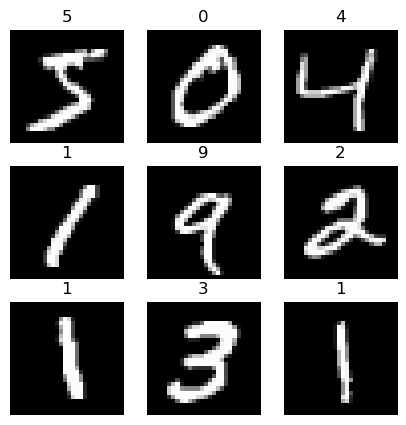

In [124]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(5, 5))
for i, (x, y) in enumerate(train_loader):
    if i == 0:
        for j in range(9):
            idx, idy = int(j / 3), j % 3
            axs[idx][idy].imshow(x[j].reshape((28, 28)), cmap="gray")
            axs[idx][idy].axis('off')
            axs[idx][idy].set_title(y[j].item())
    else:
        break

In [125]:
# 将预测数字和标签转为one-hot decoding的概率向量10*1

In [126]:
from torch import nn
import torch.nn.functional as F


class MnistClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(28 * 28, 128)
        self.hidden2 = nn.Linear(128, 256)
        self.out = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = self.out(x)
        return x

In [127]:
# display model
model = MnistClassificationModel()
print(model)

for name, param in model.named_parameters():
    print(name, param)

MnistClassificationModel(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
)
hidden1.weight Parameter containing:
tensor([[-0.0094, -0.0234, -0.0148,  ...,  0.0041, -0.0247, -0.0145],
        [-0.0299, -0.0160, -0.0316,  ...,  0.0316, -0.0146,  0.0118],
        [-0.0075,  0.0207,  0.0044,  ...,  0.0191, -0.0315, -0.0326],
        ...,
        [ 0.0286,  0.0199, -0.0257,  ...,  0.0221,  0.0210,  0.0237],
        [-0.0232,  0.0318, -0.0283,  ..., -0.0288,  0.0195,  0.0300],
        [ 0.0077,  0.0167,  0.0054,  ..., -0.0050, -0.0049,  0.0280]],
       requires_grad=True)
hidden1.bias Parameter containing:
tensor([-1.9757e-03,  1.9290e-02,  2.8761e-02, -1.1444e-02,  1.2169e-02,
        -2.7994e-03, -6.9148e-03,  2.5439e-02,  3.5351e-02,  2.3501e-03,
         3.3446e-02, -2.4387e-02, -2.7934e-02, -1.5172e-02,  3.1243e-02,
        -8.3450e-03, -2.733

In [128]:
# optimizer & cost function
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
cost = F.cross_entropy

In [129]:
# device
use_cuda = torch.cuda.is_available()
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = model.to(device)

In [130]:
# train
def train():
    model.train()
    for epoch in range(epochs):
        batch_loss = []
        for batch_id, (batch_x, batch_y) in enumerate(train_loader):
            batch_x = batch_x.to(device)
            batch_y = batch_y.to(device)

            batch_x = batch_x.reshape(len(batch_x), 28 * 28)

            optimizer.zero_grad()  # 梯度清零
            output = model(batch_x)  # 前向传播
            loss = cost(output, batch_y)  # 计算代价函数
            loss.backward()  #反向传播
            optimizer.step()  #更新
            if use_cuda:
                batch_loss.append(loss.data.cpu().numpy())
            else:
                batch_loss.append(loss.data.numpy())

            if batch_id % 100 == 0 and len(batch_x) == batch_size:
                print(
                    f"\tepoch={epoch}, {batch_id * batch_size}/{len(train_loader.dataset)},loss={np.mean(batch_loss)}")

train()

	epoch=0, 0/60000,loss=2.2829911708831787
	epoch=0, 6400/60000,loss=2.2788710594177246
	epoch=0, 12800/60000,loss=2.263557195663452
	epoch=0, 19200/60000,loss=2.249511241912842
	epoch=0, 25600/60000,loss=2.232710599899292
	epoch=0, 32000/60000,loss=2.215754985809326
	epoch=0, 38400/60000,loss=2.1965584754943848
	epoch=0, 44800/60000,loss=2.1759707927703857
	epoch=0, 51200/60000,loss=2.1525979042053223
	epoch=0, 57600/60000,loss=2.125864267349243
	epoch=1, 0/60000,loss=1.8248709440231323
	epoch=1, 6400/60000,loss=1.793212890625
	epoch=1, 12800/60000,loss=1.7522695064544678
	epoch=1, 19200/60000,loss=1.7173658609390259
	epoch=1, 25600/60000,loss=1.6684268712997437
	epoch=1, 32000/60000,loss=1.6266632080078125
	epoch=1, 38400/60000,loss=1.5812791585922241
	epoch=1, 44800/60000,loss=1.5370010137557983
	epoch=1, 51200/60000,loss=1.4932098388671875
	epoch=1, 57600/60000,loss=1.4480831623077393
	epoch=2, 0/60000,loss=1.0731754302978516
	epoch=2, 6400/60000,loss=0.9880673289299011
	epoch=2, 12

In [133]:
# test
def test():
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for (test_x, test_y) in test_loader:
            test_x = test_x.to(device)
            test_y = test_y.to(device)

            test_x = test_x.reshape(len(test_x), 28 * 28)
            output = model(test_x)
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(test_y.data.view_as(pred)).sum()

    print(f"accuracy={correct / len(test_loader.dataset)}")


test()

accuracy=0.907800018787384


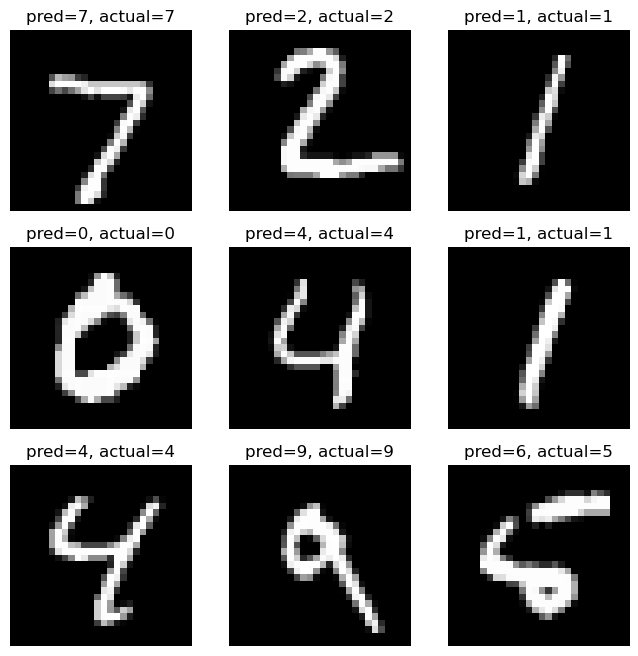

In [134]:
# visualize
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

for i, (test_x, test_y) in enumerate(test_loader):
    test_x = test_x.to(device)
    test_y = test_y.to(device)

    test_x = test_x.reshape(len(test_x), 28 * 28)
    output = model(test_x)
    pred = output.data.max(1, keepdim=True)[1]
    if i == 0:
        for j in range(9):
            idx, idy = int(j / 3), j % 3
            axs[idx][idy].imshow(test_x[j].reshape((28, 28)), cmap="gray")
            axs[idx][idy].axis('off')
            axs[idx][idy].set_title(f"pred={pred[j].item()}, actual={test_y[j].item()}")
    else:
        break